In [46]:
import numpy as np

import torch
from torchvision import datasets, transforms

In [47]:
dataset = datasets.ImageFolder('C:/Users/timev/Desktop/posture_detection/Postures')

In [48]:
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32, shuffle=True)

In [49]:
torchvision.transforms.functional.rgb_to_grayscale(dataset: torch.Tensor, num_output_channels: int = 1)

SyntaxError: invalid syntax (<ipython-input-49-bcffe91a6fd1>, line 1)

In [50]:
dataset[0]


(<PIL.Image.Image image mode=RGB size=512x512 at 0x2E77C725948>, 0)

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline


Label: 1


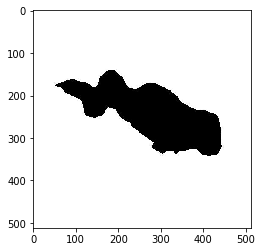

In [52]:
image, label = dataset[2300]
plt.imshow(image, cmap='gray')
print('Label:', label)


In [53]:
import torchvision.transforms as transforms

In [54]:
pre_process = transforms.Compose([transforms.ToTensor(),transforms.Grayscale(num_output_channels=1)])
dataset = datasets.ImageFolder('C:/Users/timev/Desktop/posture_detection/Postures',pre_process)


In [55]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 512, 512]) 0


In [56]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [2880,1920])
len(train_ds), len(val_ds)

(2880, 1920)

In [57]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [58]:
#model

In [59]:
import torch.nn as nn

input_size = 512*512
num_classes = 4

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [60]:
print(model.weight.shape)
model.weight

torch.Size([4, 262144])


Parameter containing:
tensor([[-0.0008, -0.0004,  0.0015,  ...,  0.0015,  0.0017, -0.0009],
        [ 0.0015,  0.0015, -0.0014,  ...,  0.0010,  0.0003,  0.0003],
        [-0.0011, -0.0015, -0.0019,  ..., -0.0003,  0.0010, -0.0019],
        [-0.0006, -0.0002,  0.0002,  ..., -0.0006, -0.0007, -0.0013]],
       requires_grad=True)

In [61]:
print(model.weight.shape)
model.weight

torch.Size([4, 262144])


Parameter containing:
tensor([[-0.0008, -0.0004,  0.0015,  ...,  0.0015,  0.0017, -0.0009],
        [ 0.0015,  0.0015, -0.0014,  ...,  0.0010,  0.0003,  0.0003],
        [-0.0011, -0.0015, -0.0019,  ..., -0.0003,  0.0010, -0.0019],
        [-0.0006, -0.0002,  0.0002,  ..., -0.0006, -0.0007, -0.0013]],
       requires_grad=True)

In [62]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([0, 3, 1, 3, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 3, 2, 0, 1, 2, 0, 3, 3, 2, 1,
        1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 3, 2, 2, 3, 2, 0, 2, 0, 0, 0, 2, 0,
        1, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 3, 3, 3, 1, 3, 1, 2, 1, 0, 0, 1, 1, 1,
        3, 0, 0, 2, 2, 3, 0, 1, 0, 3, 0, 2, 3, 2, 3, 0, 2, 0, 3, 2, 0, 3, 1, 1,
        2, 0, 3, 2, 0, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 3, 1, 0, 0,
        2, 0, 1, 2, 0, 0, 3, 0])
torch.Size([128, 1, 512, 512])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (65536x512 and 262144x4)

In [63]:
images.shape

torch.Size([128, 1, 512, 512])

In [64]:
images.reshape(128, 262144)

tensor([[0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999],
        [0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999],
        [0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999],
        ...,
        [0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999],
        [0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999],
        [0.9999, 0.9999, 0.9999,  ..., 0.9999, 0.9999, 0.9999]])

In [65]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1,262144)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [66]:
model.linear

Linear(in_features=262144, out_features=4, bias=True)

In [67]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([4, 262144]) torch.Size([4])


[Parameter containing:
 tensor([[-1.3474e-03,  9.5599e-05,  1.0620e-03,  ...,  1.6486e-03,
           3.2671e-04,  1.5591e-03],
         [-1.5116e-03, -1.7041e-03, -1.6470e-03,  ...,  2.8386e-04,
          -3.7257e-04,  1.4840e-03],
         [-4.8844e-04,  1.4400e-03, -2.6598e-04,  ...,  1.3898e-03,
          -4.1168e-04,  1.0717e-04],
         [ 2.9574e-04,  1.1472e-04,  1.4239e-03,  ...,  1.5887e-03,
           9.7986e-04, -1.4601e-03]], requires_grad=True),
 Parameter containing:
 tensor([ 5.9225e-04, -4.9367e-05, -5.1095e-04, -1.2484e-03],
        requires_grad=True)]

In [68]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 512, 512])
outputs.shape :  torch.Size([128, 4])
Sample outputs :
 tensor([[-0.0052,  0.0690,  0.3812, -0.5545],
        [-0.4811, -0.2231,  0.8369, -0.5982]])


In [69]:
import torch.nn.functional as F

In [70]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.2424, 0.2610, 0.3567, 0.1399],
        [0.1445, 0.1871, 0.5399, 0.1285]])
Sum:  1.0


In [71]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
        1, 2, 2, 2, 2, 2, 2, 2])
tensor([0.3567, 0.5399, 0.5389, 0.3126, 0.3721, 0.4612, 0.4070, 0.3582, 0.4423,
        0.3816, 0.4216, 0.3314, 0.4423, 0.5130, 0.3653, 0.4250, 0.4867, 0.3837,
        0.3242, 0.4737, 0.3484, 0.3466, 0.4479, 0.4346, 0.4226, 0.4639, 0.3949,
        0.4033, 0.3670, 0.4325, 0.3968, 0.4720, 0.3652, 0.4521, 0.3646, 0.2832,
        0.4788, 0.4960, 0.4482, 0.4204, 0.4082, 0.3454, 0.4641, 0.4493, 0.4351,
        0.3884, 0.4862, 0.4666, 0.4464, 0.3625, 0.3253, 0.4378, 0.4552, 0.4586,
        0.5368, 0.3947, 0.4027, 0.4622, 0.3681, 0.4982, 0.4873, 0.3562, 0.4594,
       

In [72]:
labels

tensor([0, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 0, 0, 0, 3, 0, 1, 2, 1, 1, 3, 2, 1, 2,
        1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 2, 2, 3, 3, 2, 3, 1, 3, 2, 0, 1, 2, 1, 2,
        0, 0, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 0, 1, 0, 2, 3, 3, 2, 1, 0, 0, 3,
        2, 2, 2, 3, 2, 2, 0, 3, 3, 1, 3, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 3, 2, 0,
        2, 0, 0, 1, 0, 2, 1, 1, 2, 3, 2, 2, 3, 3, 2, 3, 1, 0, 1, 3, 1, 0, 2, 3,
        3, 1, 3, 0, 3, 1, 2, 3])

In [73]:
torch.sum(preds == labels)

tensor(34)

In [75]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [76]:
accuracy(outputs, labels)

tensor(0.2656)

In [77]:
probs

tensor([[0.2424, 0.2610, 0.3567, 0.1399],
        [0.1445, 0.1871, 0.5399, 0.1285],
        [0.1592, 0.1806, 0.5389, 0.1212],
        [0.1640, 0.3126, 0.3029, 0.2204],
        [0.1817, 0.3093, 0.3721, 0.1368],
        [0.1724, 0.2287, 0.4612, 0.1376],
        [0.2517, 0.2548, 0.4070, 0.0864],
        [0.2711, 0.2503, 0.3582, 0.1203],
        [0.1748, 0.2045, 0.4423, 0.1784],
        [0.2415, 0.1925, 0.3816, 0.1844],
        [0.2345, 0.1962, 0.4216, 0.1477],
        [0.3234, 0.1847, 0.3314, 0.1605],
        [0.1551, 0.2719, 0.4423, 0.1307],
        [0.1594, 0.2112, 0.5130, 0.1164],
        [0.2331, 0.2775, 0.3653, 0.1241],
        [0.2175, 0.2200, 0.4250, 0.1375],
        [0.1418, 0.1970, 0.4867, 0.1745],
        [0.1955, 0.2652, 0.3837, 0.1557],
        [0.2969, 0.2196, 0.3242, 0.1593],
        [0.1923, 0.2087, 0.4737, 0.1253],
        [0.1969, 0.3164, 0.3484, 0.1382],
        [0.2120, 0.3466, 0.3262, 0.1152],
        [0.1947, 0.2156, 0.4479, 0.1417],
        [0.1973, 0.2364, 0.4346, 0

In [78]:
loss_fn = F.cross_entropy

In [79]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(1.4920, grad_fn=<NllLossBackward0>)


In [86]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [87]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [88]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 262144)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [89]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 1.5061067342758179, 'val_acc': 0.24635416269302368}

In [90]:
history1 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 35.5555, val_acc: 0.2510
Epoch [1], val_loss: 22.9084, val_acc: 0.4943
Epoch [2], val_loss: 23.5625, val_acc: 0.5578
Epoch [3], val_loss: 19.4305, val_acc: 0.3526
Epoch [4], val_loss: 8.9395, val_acc: 0.6026
